In [1]:
def read_data_from_file(file_path):
    data = []
    try:
        with open(file_path, 'r') as file:
            for line in file:
                try:
                    data.append(float(line.strip()))
                except ValueError:
                    print(f"Ignoring non-numeric data: {line.strip()}")
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
    return data

def perform_numerical_calculations(data):
    try:
        if not data:
            raise ValueError("No numerical data found.")
        total = sum(data)
        average = total / len(data)
        return total, average
    except ZeroDivisionError:
        print("Cannot calculate average: Division by zero.")
    except Exception as e:
        print(f"An error occurred during numerical calculations: {e}")

if __name__ == "__main__":
    file_path = 'data.txt'  # Update with your file path
    data = read_data_from_file(file_path)
    total, average = perform_numerical_calculations(data)
    if total is not None and average is not None:
        print(f"Total: {total}")
        print(f"Average: {average}")

Ignoring non-numeric data: abc
Total: 360.0
Average: 45.0


Descriptive Statistics using NumPy:
[[ 10.          10.          10.          10.        ]
 [  5.5          2.5         50.         102.3       ]
 [  3.02765035   1.26929552  24.49489743   1.15950181]
 [  1.           1.          20.         101.        ]
 [  3.25         2.          27.5        101.25      ]
 [  5.5          2.          50.         102.        ]
 [  7.75         3.          72.5        103.        ]
 [ 10.           5.          80.         104.        ]]

Descriptive Statistics using Pandas:
       Transaction_ID   Quantity  Price_per_Unit  Customer_ID
count        10.00000  10.000000       10.000000    10.000000
mean          5.50000   2.500000       50.000000   102.300000
std           3.02765   1.269296       24.494897     1.159502
min           1.00000   1.000000       20.000000   101.000000
25%           3.25000   2.000000       27.500000   101.250000
50%           5.50000   2.000000       50.000000   102.000000
75%           7.75000   3.000000       72.500000   

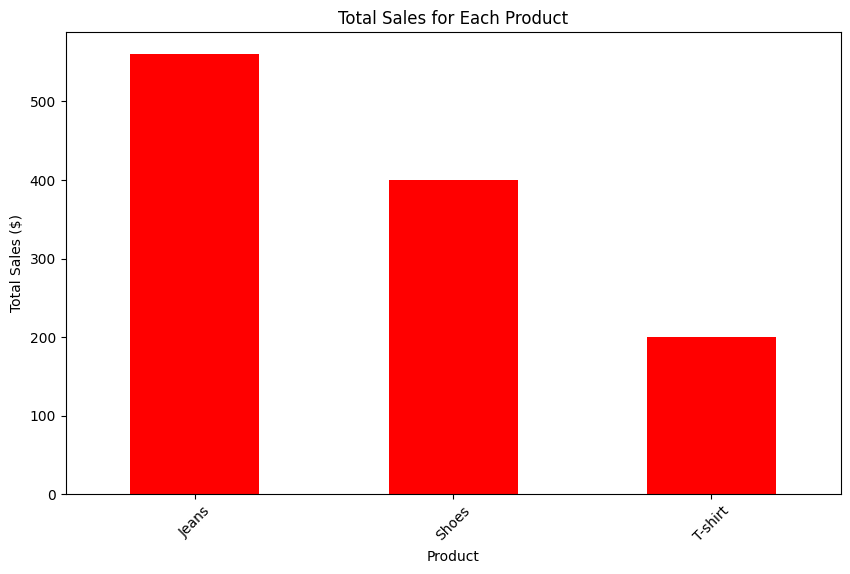

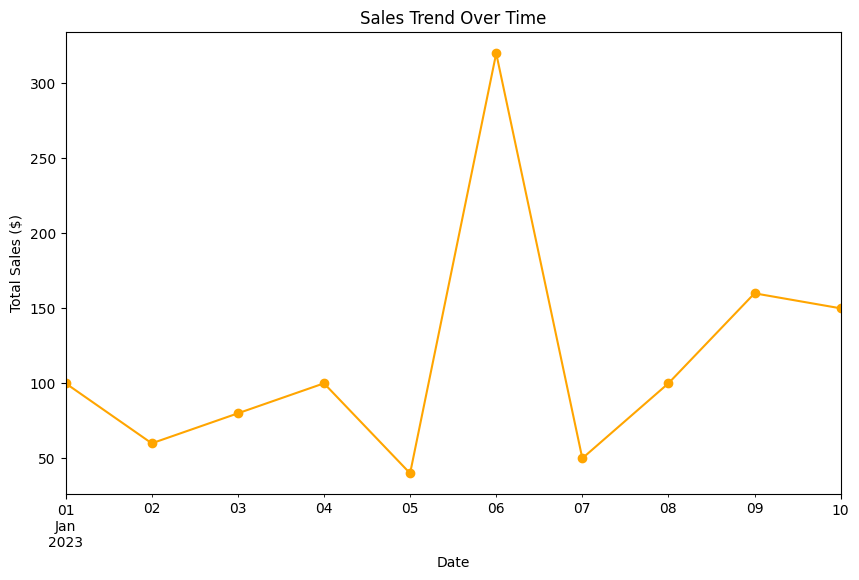

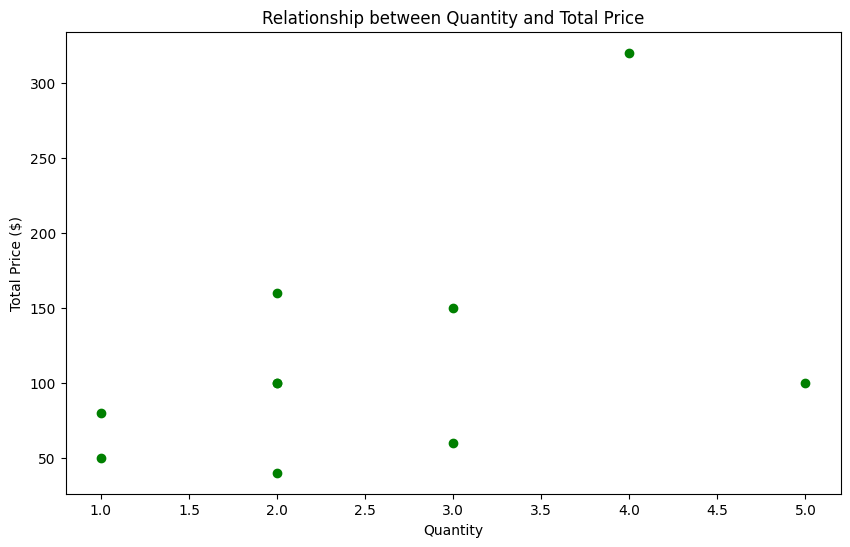


Correlation Coefficient between Quantity and Total Price: 0.4715723507347863

Average Total Spending per Customer:
Customer_ID
101    100.000000
102    176.666667
103     65.000000
104    100.000000
Name: Total_Price, dtype: float64


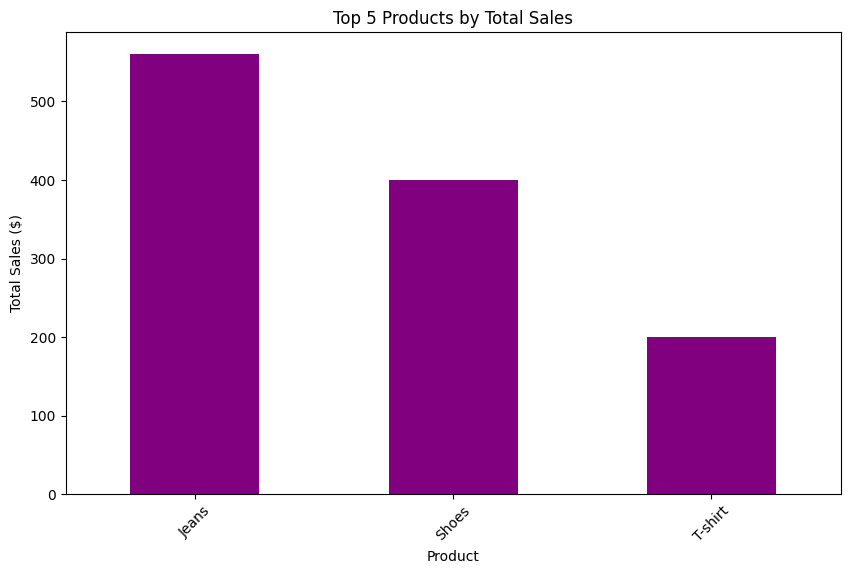

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Loading and Exploration
df = pd.read_csv('sales_data.csv')
print("Descriptive Statistics using NumPy:")
print(np.array(df.describe()))
print("\nDescriptive Statistics using Pandas:")
print(df.describe())
print("\nFirst few rows of the dataset:")
print(df.head())

# Data Cleaning and Manipulation
print("\nMissing values:")
print(df.isnull().sum())
df['Date'] = pd.to_datetime(df['Date'])
df['Total_Price'] = df['Quantity'] * df['Price_per_Unit']

# Data Visualization
product_sales = df.groupby('Product_Name')['Total_Price'].sum()
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='red')
plt.title('Total Sales for Each Product')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sales_trend = df.groupby('Date')['Total_Price'].sum()
sales_trend.plot(kind='line', marker='o', color='orange')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['Total_Price'], color='green')
plt.title('Relationship between Quantity and Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price ($)')
plt.show()

# Advanced Analysis
correlation_coefficient = np.corrcoef(df['Quantity'], df['Total_Price'])[0, 1]
print("\nCorrelation Coefficient between Quantity and Total Price:", correlation_coefficient)

average_spending_per_customer = df.groupby('Customer_ID')['Total_Price'].mean()
print("\nAverage Total Spending per Customer:")
print(average_spending_per_customer)

top_5_products = product_sales.nlargest(5)
plt.figure(figsize=(10, 6))
top_5_products.plot(kind='bar', color='purple')
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import tkinter as tk
from tkinter import messagebox

class TicTacToe:
    def __init__(self):
        self.root = tk.Tk()
        self.root.title("Tic-Tac-Toe")
        self.current_player = "X"
        self.board = [[' ' for _ in range(3)] for _ in range(3)]
        self.buttons = [[None for _ in range(3)] for _ in range(3)]
        self.create_board()

    def create_board(self):
        for i in range(3):
            for j in range(3):
                self.buttons[i][j] = tk.Button(self.root, text="", font=("Helvetica", 20), width=5, height=2,
                                                command=lambda row=i, col=j: self.make_move(row, col))
                self.buttons[i][j].grid(row=i, column=j)

    def make_move(self, row, col):
        if self.board[row][col] == ' ':
            self.board[row][col] = self.current_player
            self.buttons[row][col].config(text=self.current_player)
            if self.check_winner() or self.check_draw():
                self.end_game()
            else:
                self.current_player = 'O' if self.current_player == 'X' else 'X'

    def check_winner(self):
        for i in range(3):
            if self.board[i][0] == self.board[i][1] == self.board[i][2] != ' ':
                self.highlight_winner(i, 0, i, 1, i, 2)
                return True
            if self.board[0][i] == self.board[1][i] == self.board[2][i] != ' ':
                self.highlight_winner(0, i, 1, i, 2, i)
                return True
        if self.board[0][0] == self.board[1][1] == self.board[2][2] != ' ':
            self.highlight_winner(0, 0, 1, 1, 2, 2)
            return True
        if self.board[0][2] == self.board[1][1] == self.board[2][0] != ' ':
            self.highlight_winner(0, 2, 1, 1, 2, 0)
            return True
        return False

    def highlight_winner(self, *coords):
        for i in range(0, len(coords), 2):
            self.buttons[coords[i]][coords[i+1]].config(bg='light green')

    def check_draw(self):
        for row in self.board:
            for cell in row:
                if cell == ' ':
                    return False
        return True

    def end_game(self):
        if self.check_winner():
            messagebox.showinfo("Winner", f"Player {self.current_player} wins!")
        else:
            messagebox.showinfo("Draw", "It's a draw!")
        self.root.quit()

    def play(self):
        self.root.mainloop()

if __name__ == "__main__":
    game = TicTacToe()
    game.play()